In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset
dataset = pd.read_csv('Dataset\heart_2020_cleaned.csv')
X = dataset.iloc[:, 1:18].values
y = dataset.iloc[:, 0].values

print(X)
print(y)

[[16.6 'Yes' 'No' ... 'Yes' 'No' 'Yes']
 [20.34 'No' 'No' ... 'No' 'No' 'No']
 [26.58 'Yes' 'No' ... 'Yes' 'No' 'No']
 ...
 [24.24 'No' 'No' ... 'No' 'No' 'No']
 [32.81 'No' 'No' ... 'No' 'No' 'No']
 [46.56 'No' 'No' ... 'No' 'No' 'No']]
['No' 'No' 'No' ... 'No' 'No' 'No']


In [5]:
# Transform text value to number
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#X[:,[1,2,3,6,7,9,10,11,12,14,15,16]] = le.fit_transform(X[:,[1,2,3,6,7,9,10,11,12,14,15,16]])
X[:,1] = le.fit_transform(X[:,1])
X[:,2] = le.fit_transform(X[:,2])
X[:,3] = le.fit_transform(X[:,3])
X[:,6] = le.fit_transform(X[:,6])
X[:,7] = le.fit_transform(X[:,7])
X[:,8] = le.fit_transform(X[:,8])
X[:,9] = le.fit_transform(X[:,9])
X[:,10] = le.fit_transform(X[:,10])
X[:,11] = le.fit_transform(X[:,11])
X[:,12] = le.fit_transform(X[:,12])
X[:,14] = le.fit_transform(X[:,14])
X[:,15] = le.fit_transform(X[:,15])
X[:,16] = le.fit_transform(X[:,16])
print("X", X)

y = le.fit_transform(y)
print("y",y)

X [[16.6 1 0 ... 1 0 1]
 [20.34 0 0 ... 0 0 0]
 [26.58 1 0 ... 1 0 0]
 ...
 [24.24 0 0 ... 0 0 0]
 [32.81 0 0 ... 0 0 0]
 [46.56 0 0 ... 0 0 0]]
y [0 0 0 ... 0 0 0]


In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
print(classifier)

KNeighborsClassifier()


In [9]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [10]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print("Confusion matrix : \n",cm)
print("Accuarcy : " , ac)

Confusion matrix : 
 [[57254  1258]
 [ 4722   725]]
Accuarcy :  0.9065026032301944


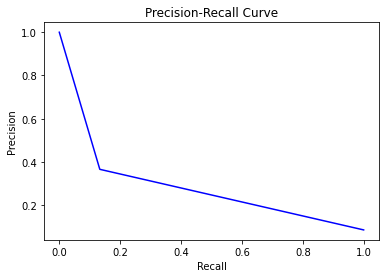

In [11]:
# Draw Precision and recall graph
from sklearn.metrics import precision_recall_curve

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='blue')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [14]:
# save the model to disk
import pickle

filename = 'KNN_model.sav'
# pickle.dump(classifier, open(filename, 'wb'))
 
# # some time later...


In [15]:
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)

loaded_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])